## 데이터 살펴보기

In [1]:
# 10개 행 출력
SELECT *
FROM omega-vector-411001.modulabs_project.data
LIMIT 10

SyntaxError: invalid syntax (138514954.py, line 2)

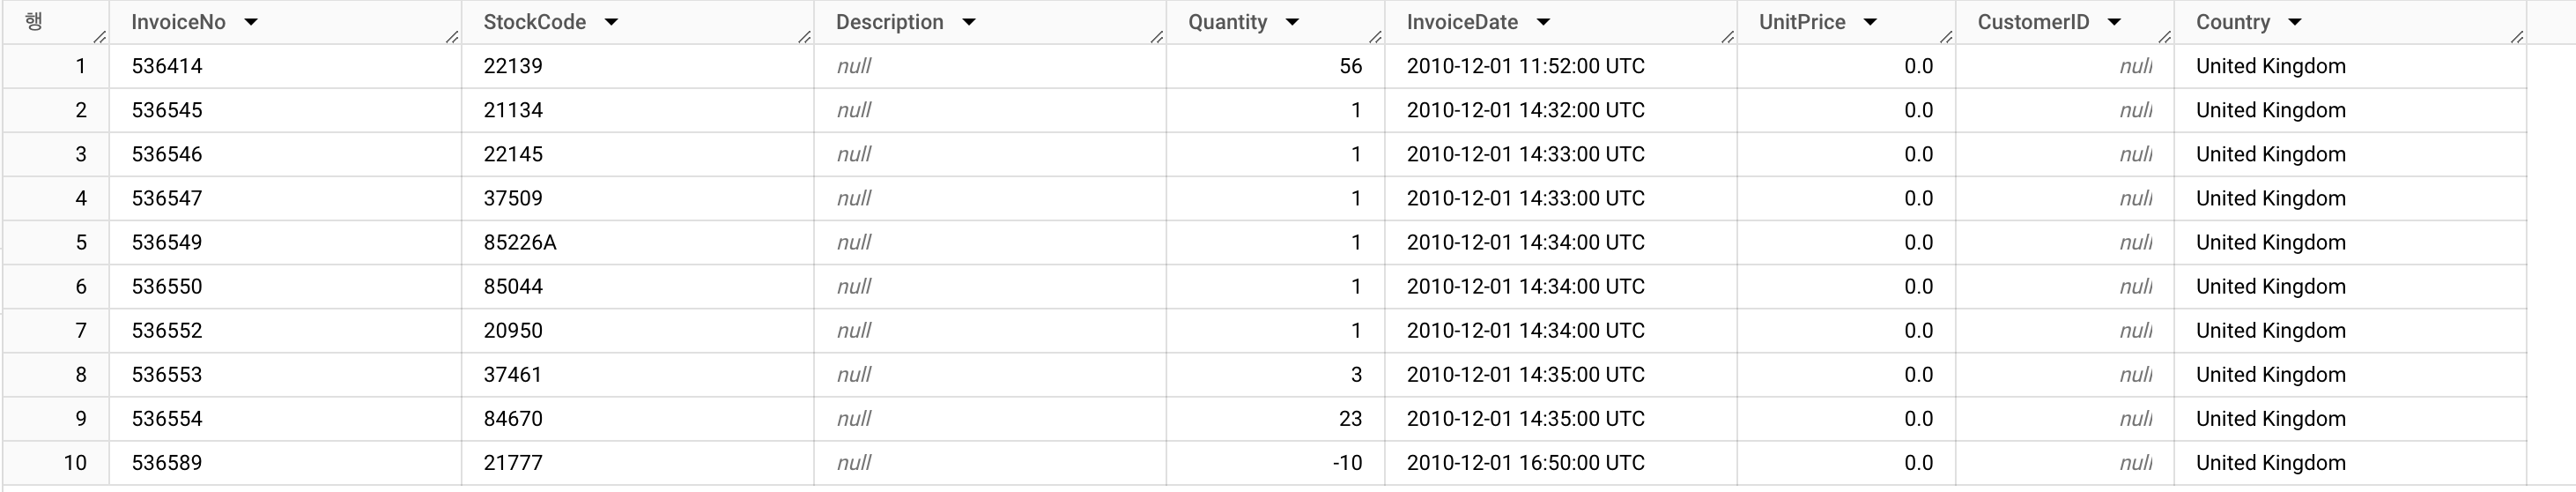

In [2]:
# 총 몇행으로 구성
SELECT COUNT(*)
FROM omega-vector-411001.modulabs_project.data

SyntaxError: invalid syntax (3258026581.py, line 2)

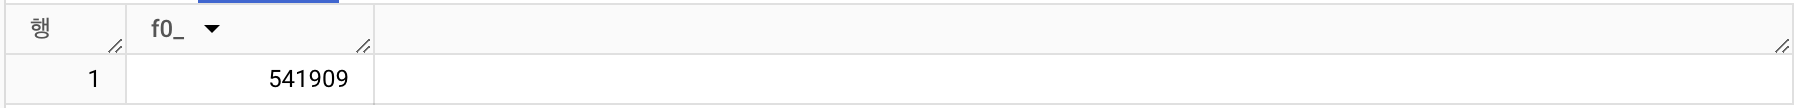

## 데이터 수 세기

In [ ]:
# 모든 컬럼에 COUNT 함수 적용
SELECT COUNT(InvoiceNo), COUNT(StockCode), COUNT(Description), COUNT(Quantity), COUNT(InvoiceDate), COUNT(UnitPrice), COUNT(CustomerID), COUNT(Country)
FROM omega-vector-411001.modulabs_project.data


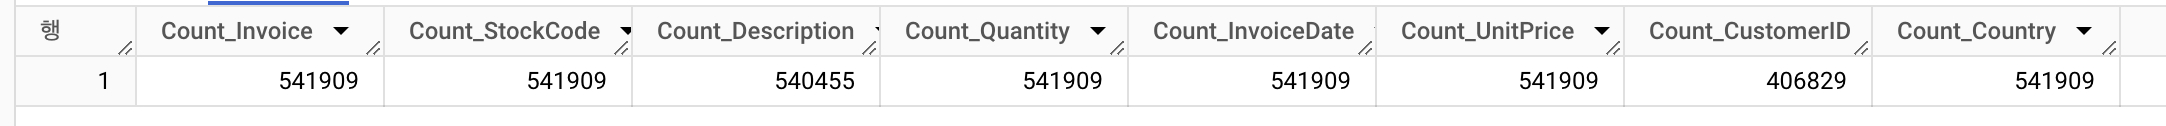

## 컬럼 별 누락된 값의 비율 계산

In [ ]:
SELECT
    'InvoiceNo' AS column_name,
    ROUND(SUM(CASE WHEN InvoiceNo IS NULL THEN 1 ELSE 0 END) / COUNT(*) * 100, 2) AS missing_percentage
FROM omega-vector-411001.modulabs_project.data
UNION ALL
SELECT
    'StockCode' AS column_name,
    ROUND(SUM(CASE WHEN StockCode IS NULL THEN 1 ELSE 0 END) / COUNT(*) * 100, 2) AS missing_percentage
FROM omega-vector-411001.modulabs_project.data
UNION ALL
SELECT
    'Description' AS column_name,
    ROUND(SUM(CASE WHEN Description IS NULL THEN 1 ELSE 0 END) / COUNT(*) * 100, 2) AS missing_percentage
FROM omega-vector-411001.modulabs_project.data
UNION ALL
SELECT
    'Quantity' AS column_name,
    ROUND(SUM(CASE WHEN Quantity IS NULL THEN 1 ELSE 0 END) / COUNT(*) * 100, 2) AS missing_percentage
FROM omega-vector-411001.modulabs_project.data

UNION ALL
SELECT
    'InvoiceDate' AS column_name,
    ROUND(SUM(CASE WHEN InvoiceDate IS NULL THEN 1 ELSE 0 END) / COUNT(*) * 100, 2) AS missing_percentage
FROM omega-vector-411001.modulabs_project.data
UNION ALL
SELECT
    'UnitPrice' AS column_name,
    ROUND(SUM(CASE WHEN UnitPrice IS NULL THEN 1 ELSE 0 END) / COUNT(*) * 100, 2) AS missing_percentage
FROM omega-vector-411001.modulabs_project.data
UNION ALL
SELECT
    'CustomerID' AS column_name,
    ROUND(SUM(CASE WHEN CustomerID IS NULL THEN 1 ELSE 0 END) / COUNT(*) * 100, 2) AS missing_percentage
FROM omega-vector-411001.modulabs_project.data
UNION ALL
SELECT
    'Country' AS column_name,
    ROUND(SUM(CASE WHEN Country IS NULL THEN 1 ELSE 0 END) / COUNT(*) * 100, 2) AS missing_percentage
FROM omega-vector-411001.modulabs_project.data

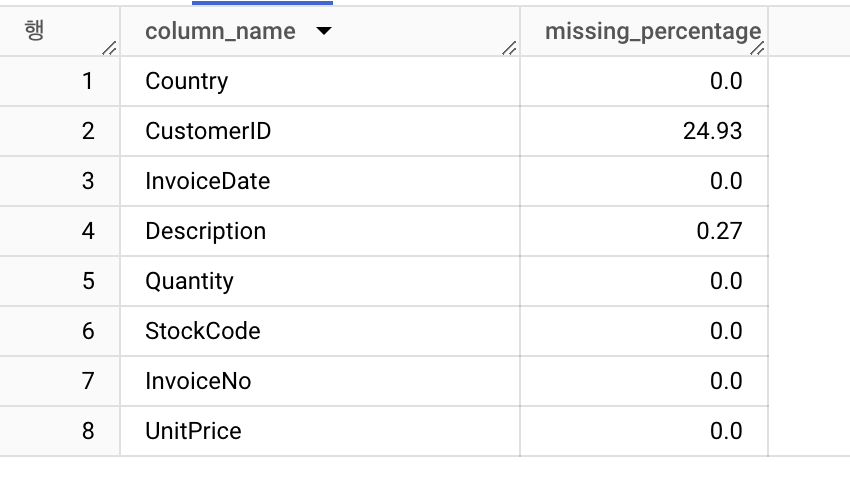

## 결측치 처리 전략

In [ ]:
SELECT DISTINCT Description
FROM omega-vector-411001.modulabs_project.data
WHERE StockCode='85123A'

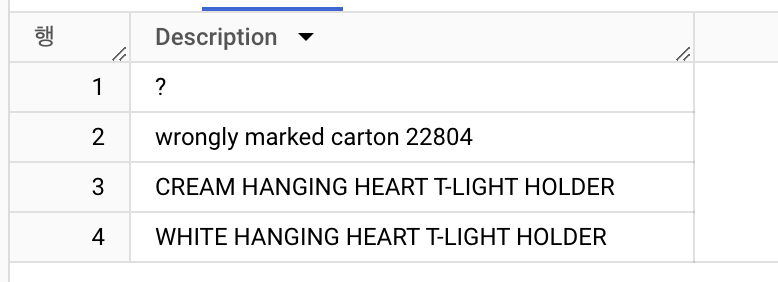

## 결측치 처리

In [ ]:
DELETE FROM omega-vector-411001.modulabs_project.data
WHERE CustomerID IS NULL OR Description IS NULL;

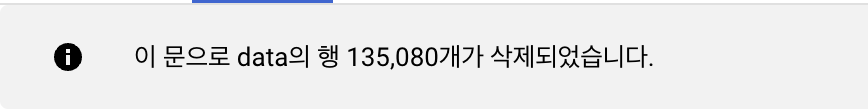

## 중복값 확인


In [ ]:
SELECT InvoiceNo, StockCode, Description, Quantity, InvoiceDate, UnitPrice, CustomerID, Country, COUNT(*) AS `중복값 갯수`
FROM omega-vector-411001.modulabs_project.data
GROUP BY InvoiceNo, StockCode, Description, Quantity, InvoiceDate, UnitPrice, CustomerID, Country
HAVING COUNT(*) > 1

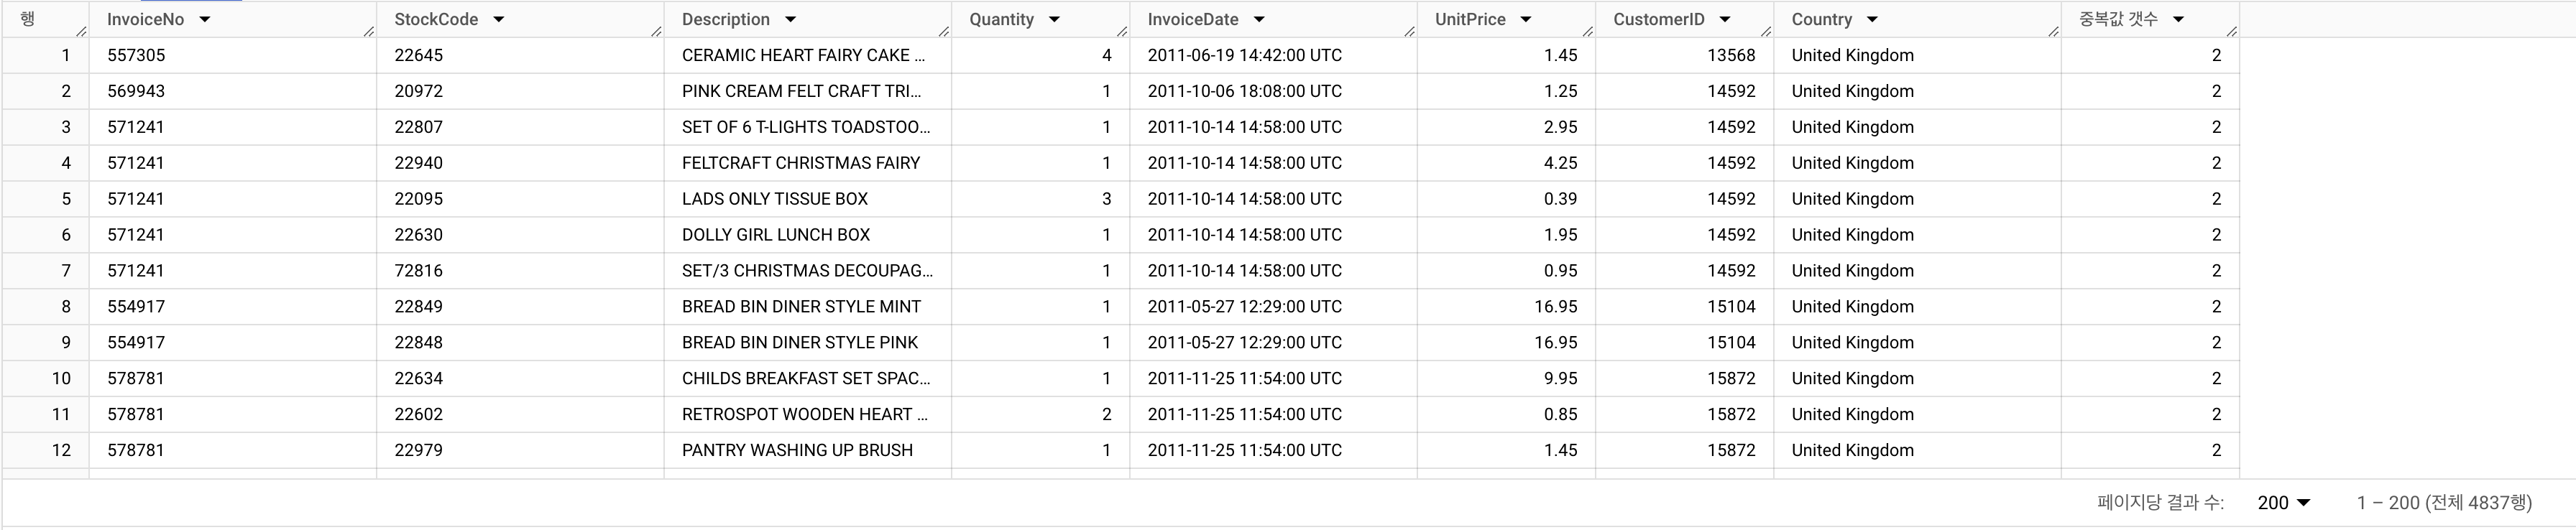

## 중복값 처리

In [ ]:
# 원본을 그대로 보존하고 새로운 테이블로 생성
CREATE OR REPLACE TABLE omega-vector-411001.modulabs_project.distinct_data AS
SELECT DISTINCT *
FROM omega-vector-411001.modulabs_project.data;

SELECT COUNT(*)
FROM omega-vector-411001.modulabs_project.distinct_data

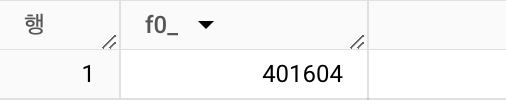

### 오류값 처리

In [ ]:
# 고유한(unique)한 InvoiceNo의 개수 출력
SELECT COUNT(DISTINCT InvoiceNo) AS unique_invoce_count
FROM omega-vector-411001.modulabs_project.distinct_data

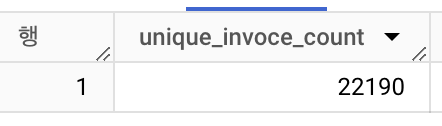

In [ ]:
# 고유한 InvoiceNo를 앞에서부터 100개를 출력

SELECT DISTINCT InvoiceNo
FROM omega-vector-411001.modulabs_project.distinct_data
LIMIT 100


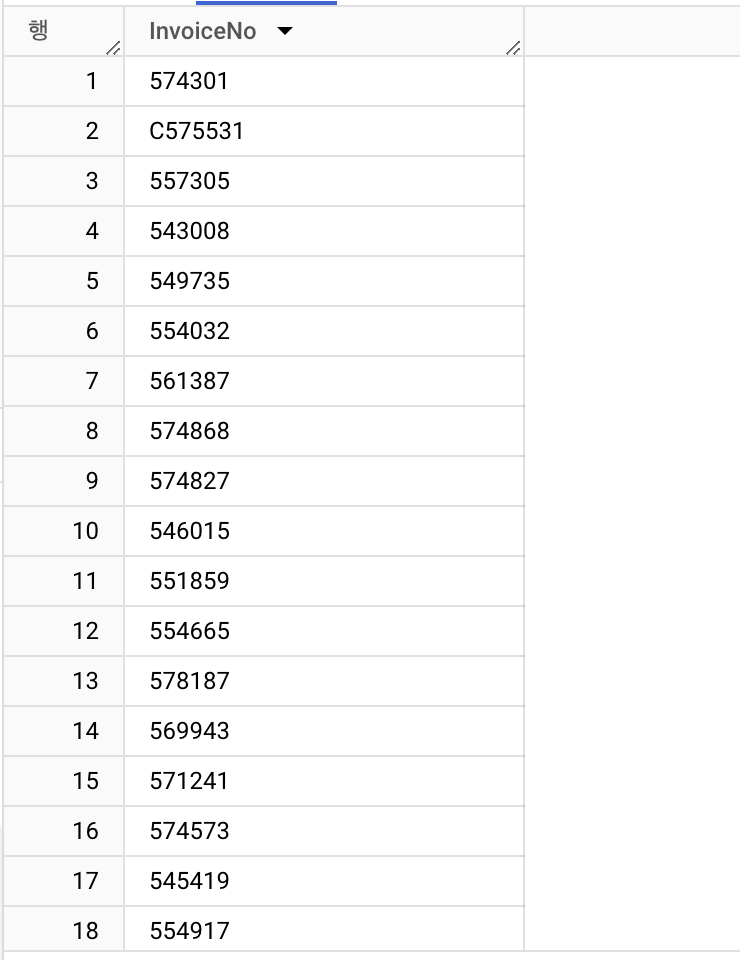

In [ ]:
# InvoiceNo가 'C'로 시작하는 행을 필터링 100행 까지만 출력

SELECT *
FROM omega-vector-411001.modulabs_project.distinct_data
WHERE InvoiceNo LIKE 'C%'
LIMIT 100

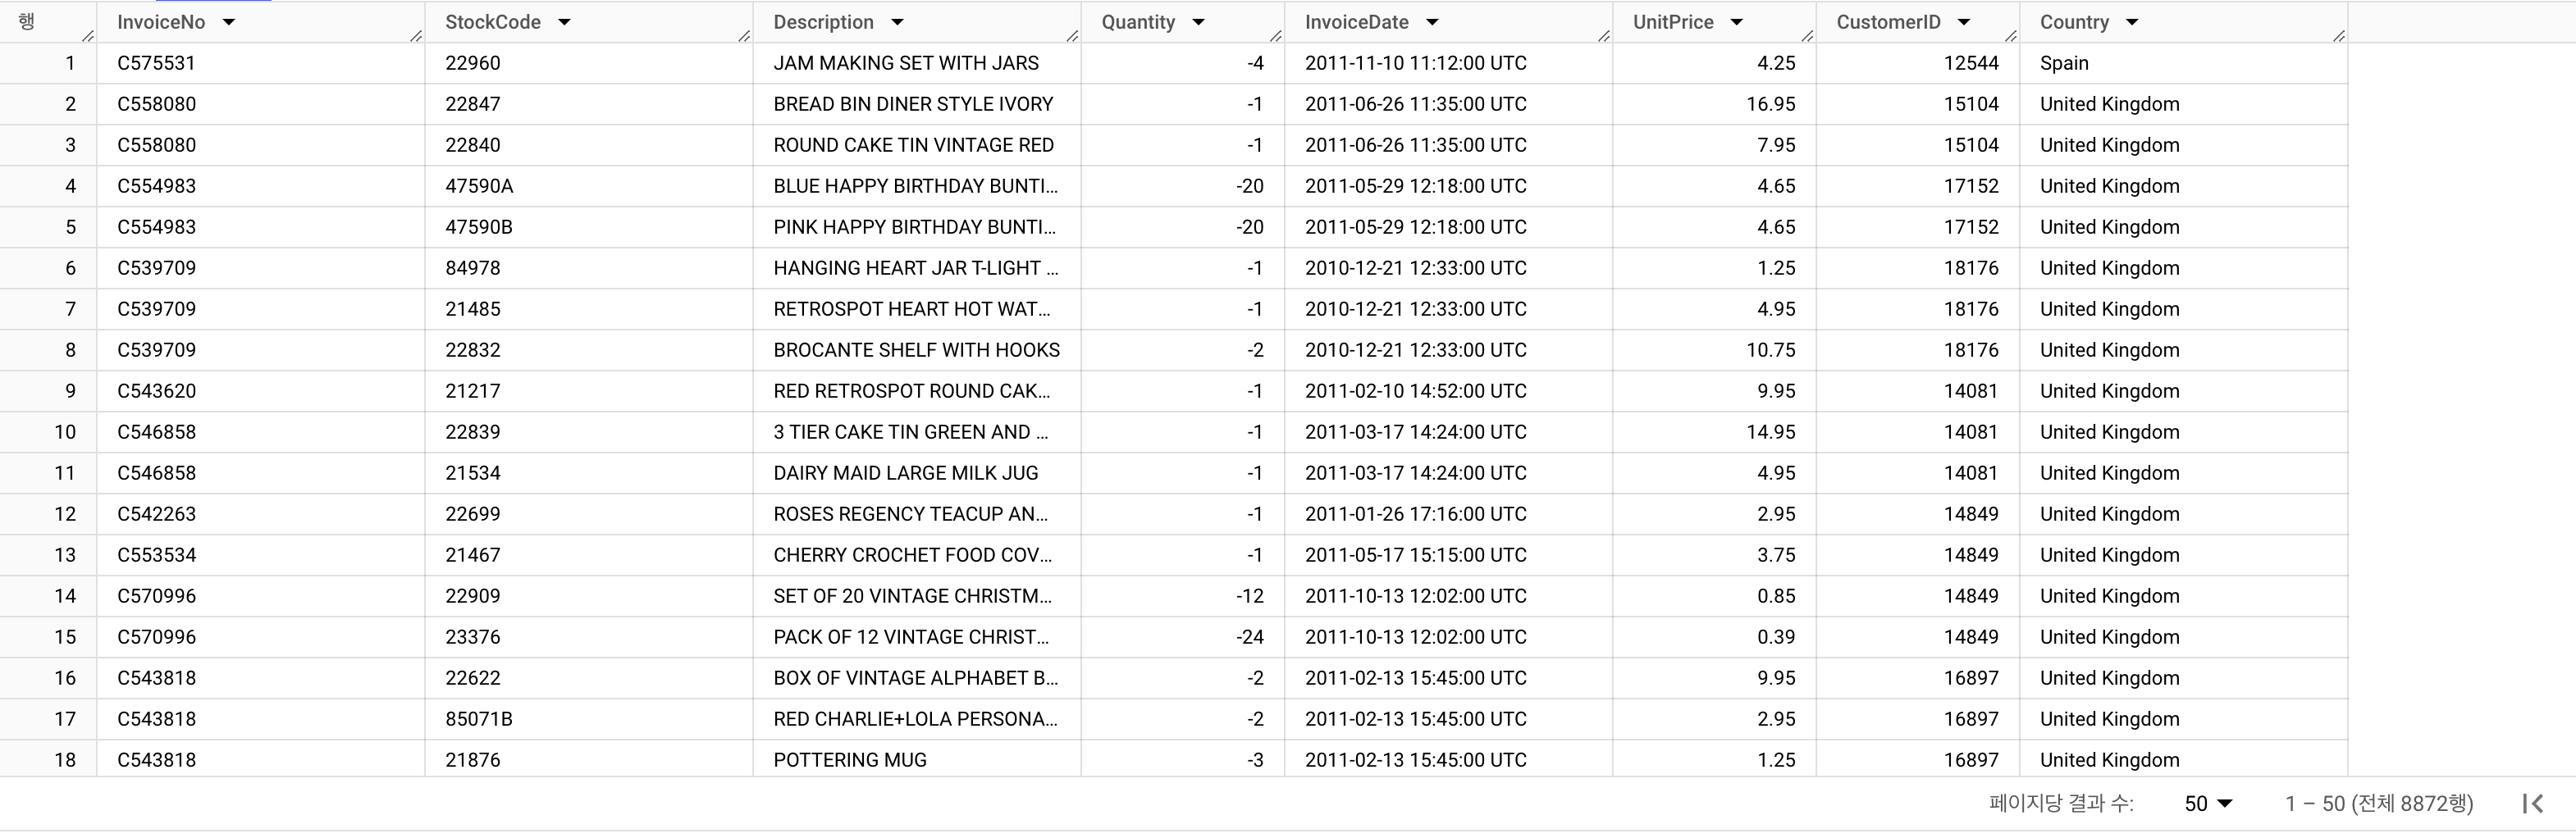

In [ ]:
# 구매 건 상태가 Canceled 인 데이터의 비율(%)은 어떻게 되나요?
SELECT 
ROUND(SUM(CASE WHEN InvoiceNo LIKE 'C%' THEN 1 ELSE 0 END) / COUNT(*) * 100, 1) AS cancel_percentage
FROM omega-vector-411001.modulabs_project.distinct_data

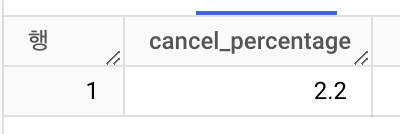

In [ ]:
# 고유한 StockCode의 개수를 출력

SELECT DISTINCT StockCode
FROM omega-vector-411001.modulabs_project.distinct_data


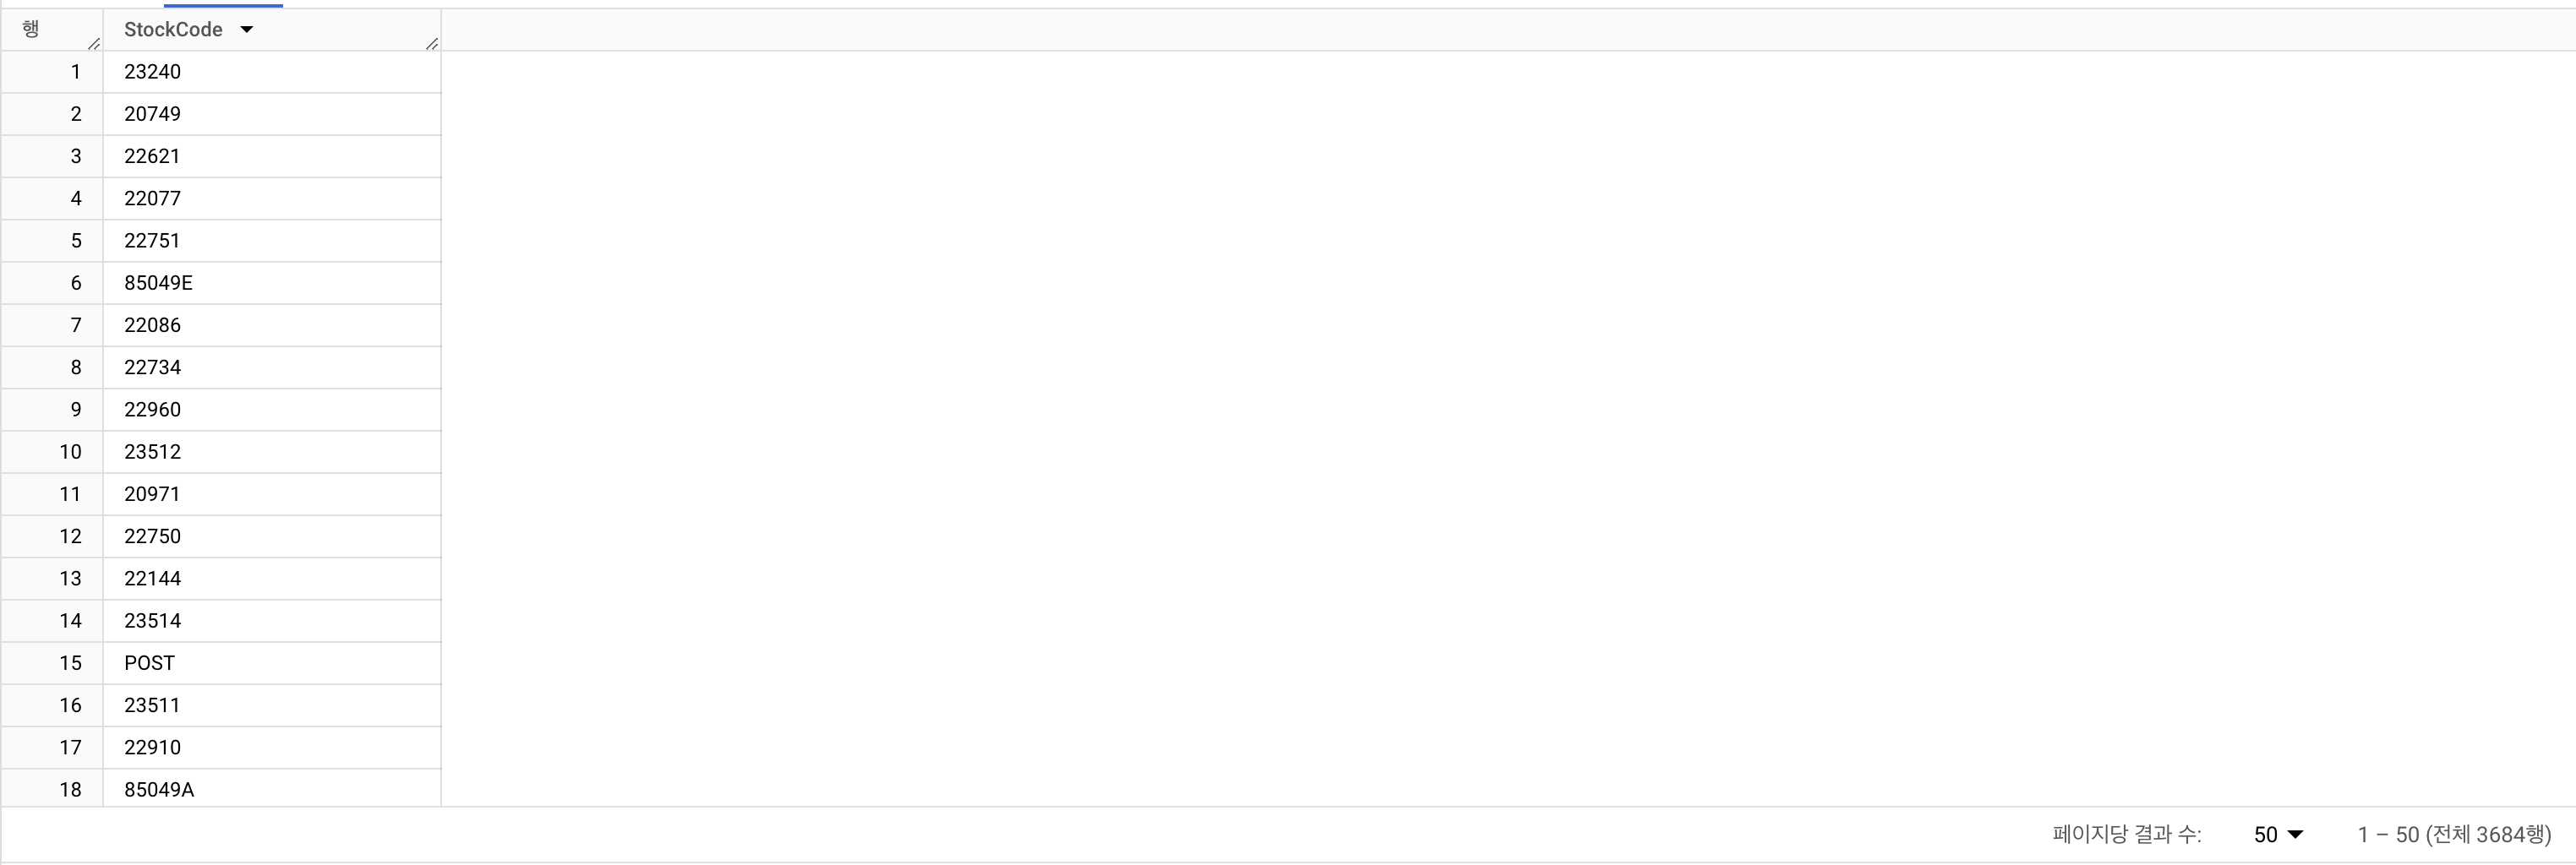

In [ ]:
#  StockCode 별 등장 빈도를 출력해보겠습니다. 상위 10개의 제품들을 출력
SELECT 
  StockCode,
  COUNT(*) AS sell_cnt
FROM omega-vector-411001.modulabs_project.distinct_data
GROUP BY StockCode
ORDER BY sell_cnt DESC
LIMIT 10

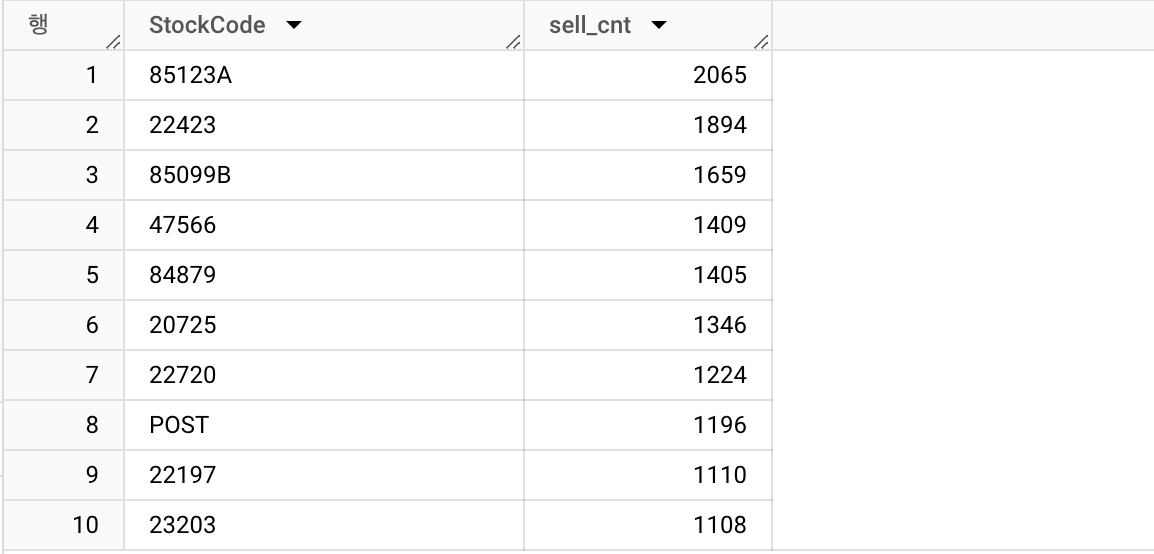

In [ ]:
# 숫자가 0~1개인 값들에는 어떤 코드들이 들어가 있는지를 확인해 봅시다.

SELECT DISTINCT StockCode, number_count
FROM (
  SELECT StockCode,
         LENGTH(StockCode) - LENGTH(REGEXP_REPLACE(StockCode, r'[0-9]','')) AS number_count
  FROM omega-vector-411001.modulabs_project.distinct_data
)
WHERE number_count IN (0, 1);

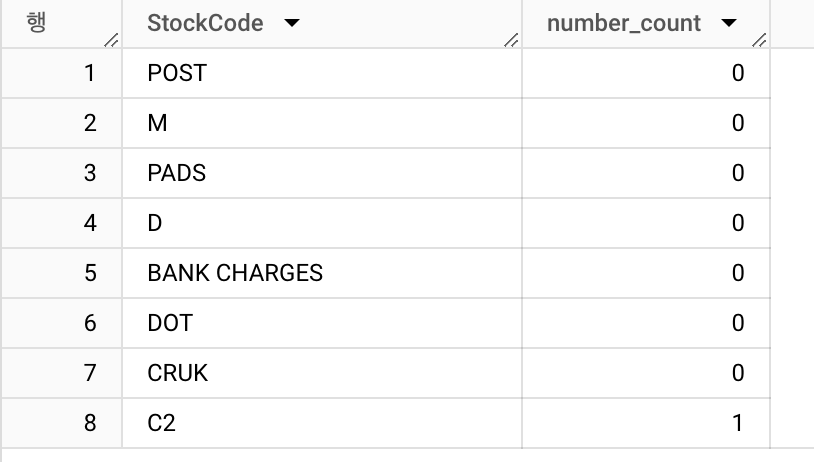

In [ ]:
# 해당 코드 값들을 가지고 있는 데이터 수는 전체 데이터 수 대비 몇 퍼센트일까요? 소수점 두번째 자리까지 구해 주세요

WITH NumberCount AS (
  SELECt StockCode,
  LENGTH(StockCOde) - LENGTH(REGEXP_REPLACE(StockCode, r'[0-9]','')) AS number_count
  FROM omega-vector-411001.modulabs_project.distinct_data
)
SELECT 
ROUND(SUM(CASE WHEN StockCode IN (SELECT DISTINCT StockCode
FROM NumberCount
WHERE number_count IN (0,1))
THEN 1 ELSE 0 END)/ COUNT(*) * 100, 2) AS stock_percentage
FROM omega-vector-411001.modulabs_project.distinct_data

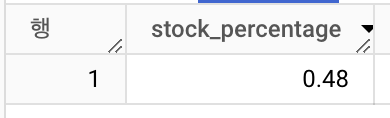

In [ ]:
# 제품과 관련되지 않은 거래 기록을 제거
DELETE FROM omega-vector-411001.modulabs_project.distinct_data
WHERE StockCode IN ('POST', 'M', 'PADS', 'D', 'BANK CHARGES', 'DOT', 'CRUK', 'C2')

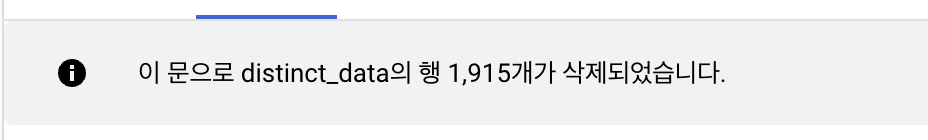

In [ ]:
# 고유한 Description 별 출현 빈도를 계산하고 상위 30개를 출력

SELECT DISTINCT Description, COUNT(*) AS description_cnt
FROM omega-vector-411001.modulabs_project.distinct_data
GROUP BY Description
ORDER BY description_cnt DESC
LIMIT 30

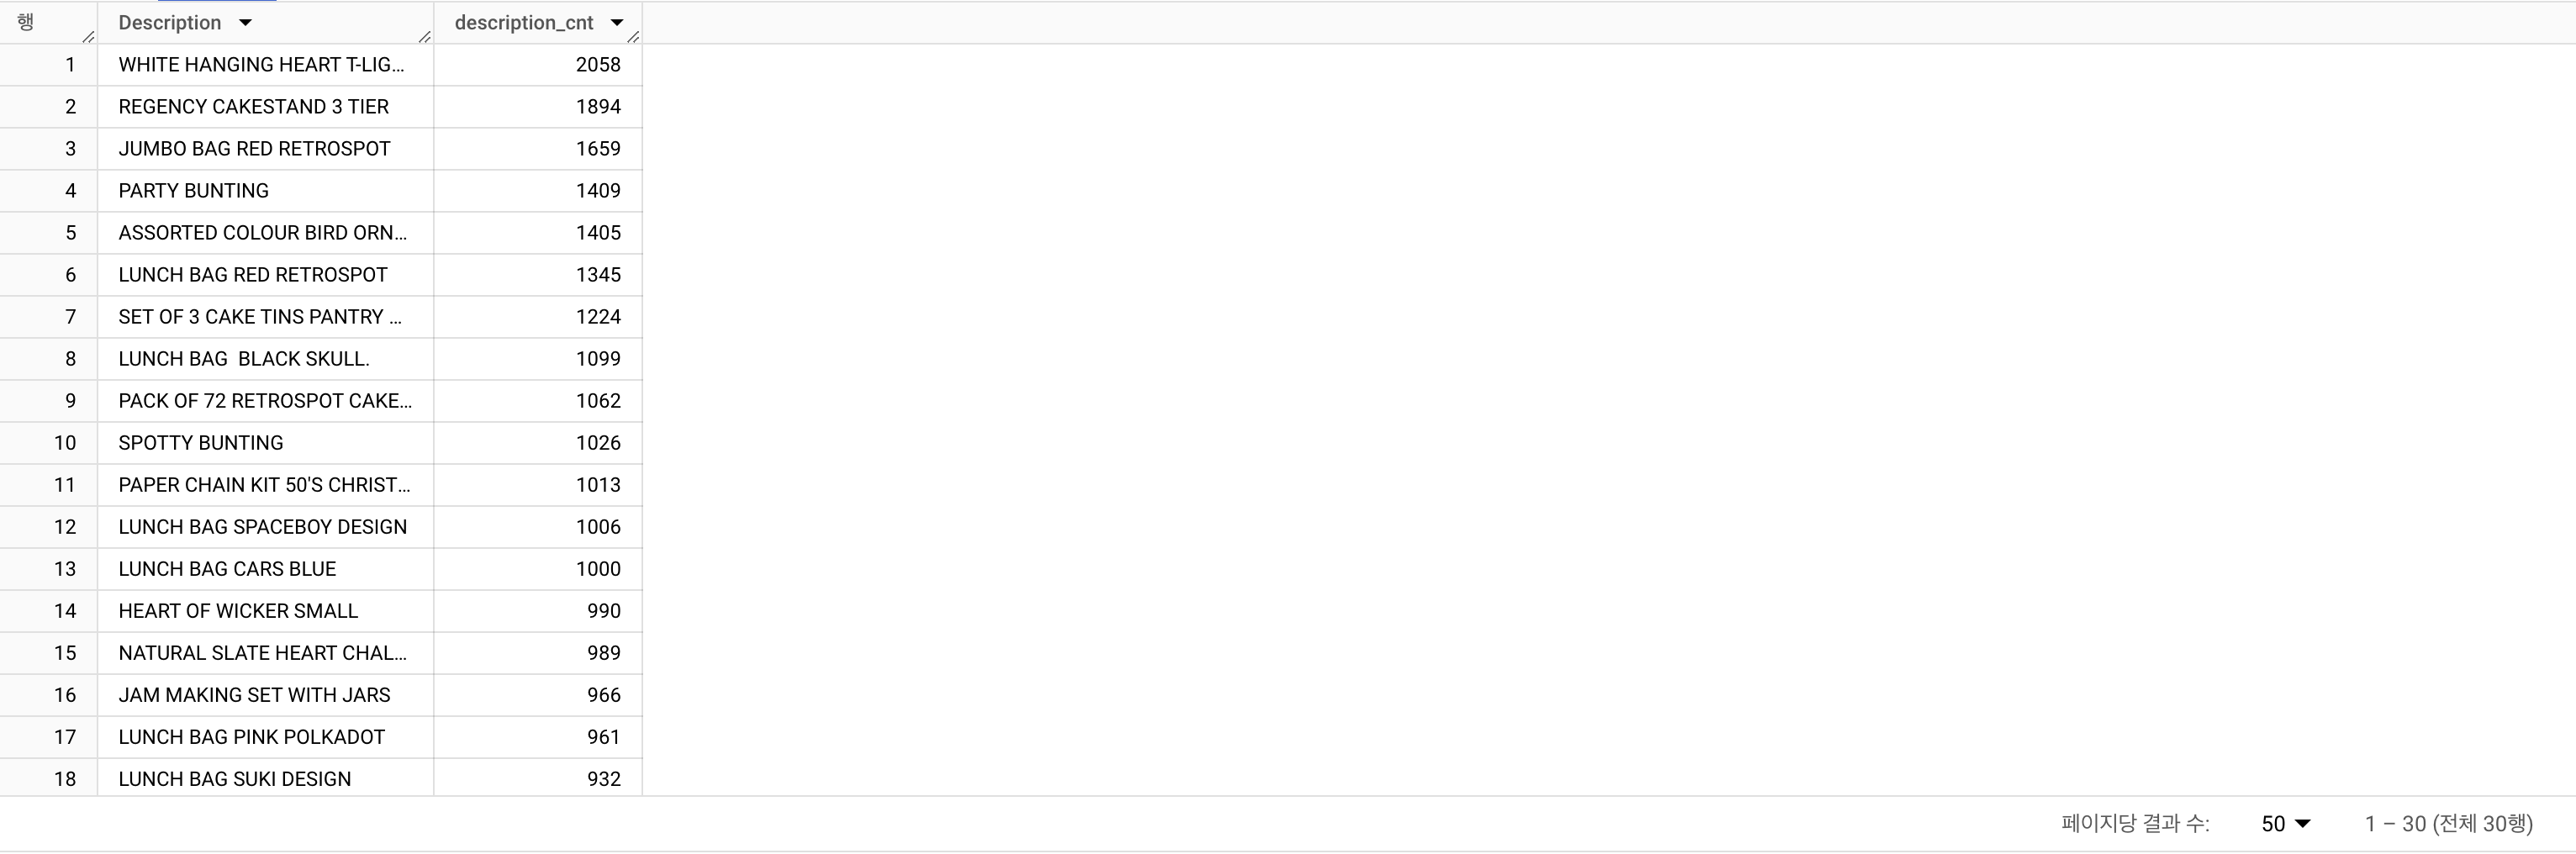

In [ ]:
# 우선 서비스 관련 정보를 포함하는 행들을 제거하는 쿼리문
DELETE FROM omega-vector-411001.modulabs_project.distinct_data
WHERE UPPER(Description) IN ('NEXT DAY CARRIAGE', 'HIGH RESOLUTION IMAGE')

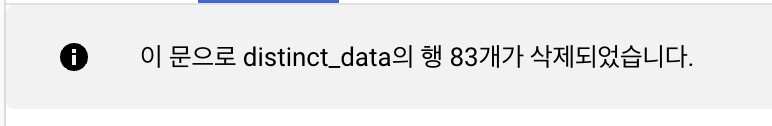

In [ ]:
# 대소문자를 혼합하고 있는 데이터를 대문자로 표준화하는 쿼리문을 작성
CREATE OR REPLACE TABLE omega-vector-411001.modulabs_project.distinct_data AS
SELECT
  * EXCEPT (Description),
  UPPER(Description) AS Description 
FROM omega-vector-411001.modulabs_project.distinct_data

실행시

SELECT DISTINCT Description


FROM omega-vector-411001.modulabs_project.distinct_data


WHERE REGEXP_CONTAINS(Description, r'[a-z]')

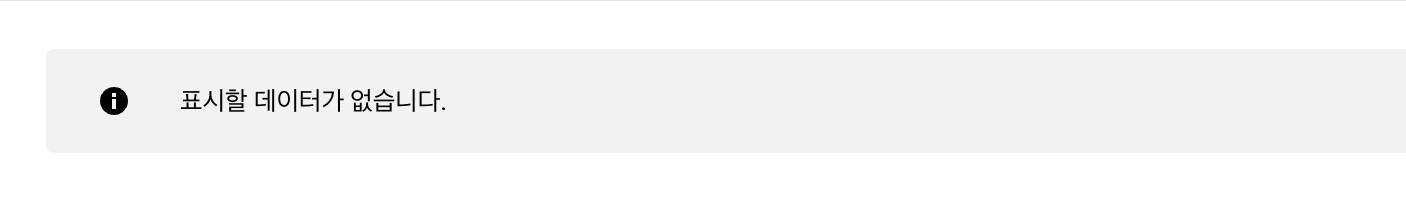

In [ ]:
# UnitPrice의 최솟값, 최댓값, 평균을 구해 보세요.

SELECT MIN(UnitPrice) AS min_price, MAX(UnitPrice) AS max_price, AVG(UnitPrice) AS avg_price
FROM omega-vector-411001.modulabs_project.distinct_data


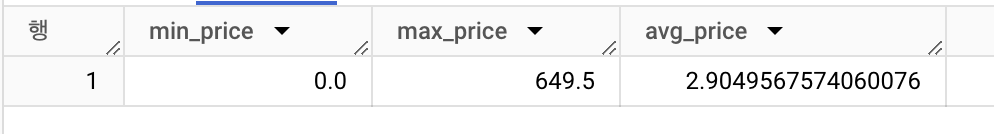

In [ ]:
# 단가가 0원인 거래의 개수, 구매 수량(Quantity)의 최솟값, 최댓값, 평균을 구해 보세요.

SELECT COUNT(*) AS cnt_quantity, MIN(Quantity) AS min_quantity, MAX(Quantity) AS max_quantity, AVG(Quantity) AS avg_quantity
FROM omega-vector-411001.modulabs_project.distinct_data
WHERE UnitPrice = 0

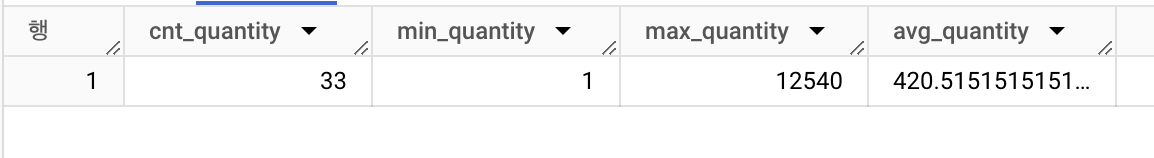

In [ ]:
# 데이터(UnitPrice = 0)를 제거
CREATE OR REPLACE TABLE omega-vector-411001.modulabs_project.distinct_data AS 
SELECT *
FROM omega-vector-411001.modulabs_project.distinct_data
WHERE UnitPrice != 0;

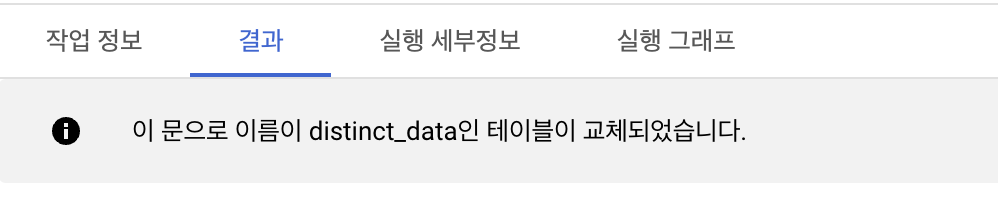

In [ ]:
# DATE 함수를 활용하여 InvoiceDate 컬럼을 연월일 자료형으로 변경해 주세요.

SELECT DATE(InvoiceDate) AS InvoiceDay, *
FROM omega-vector-411001.modulabs_project.distinct_data

m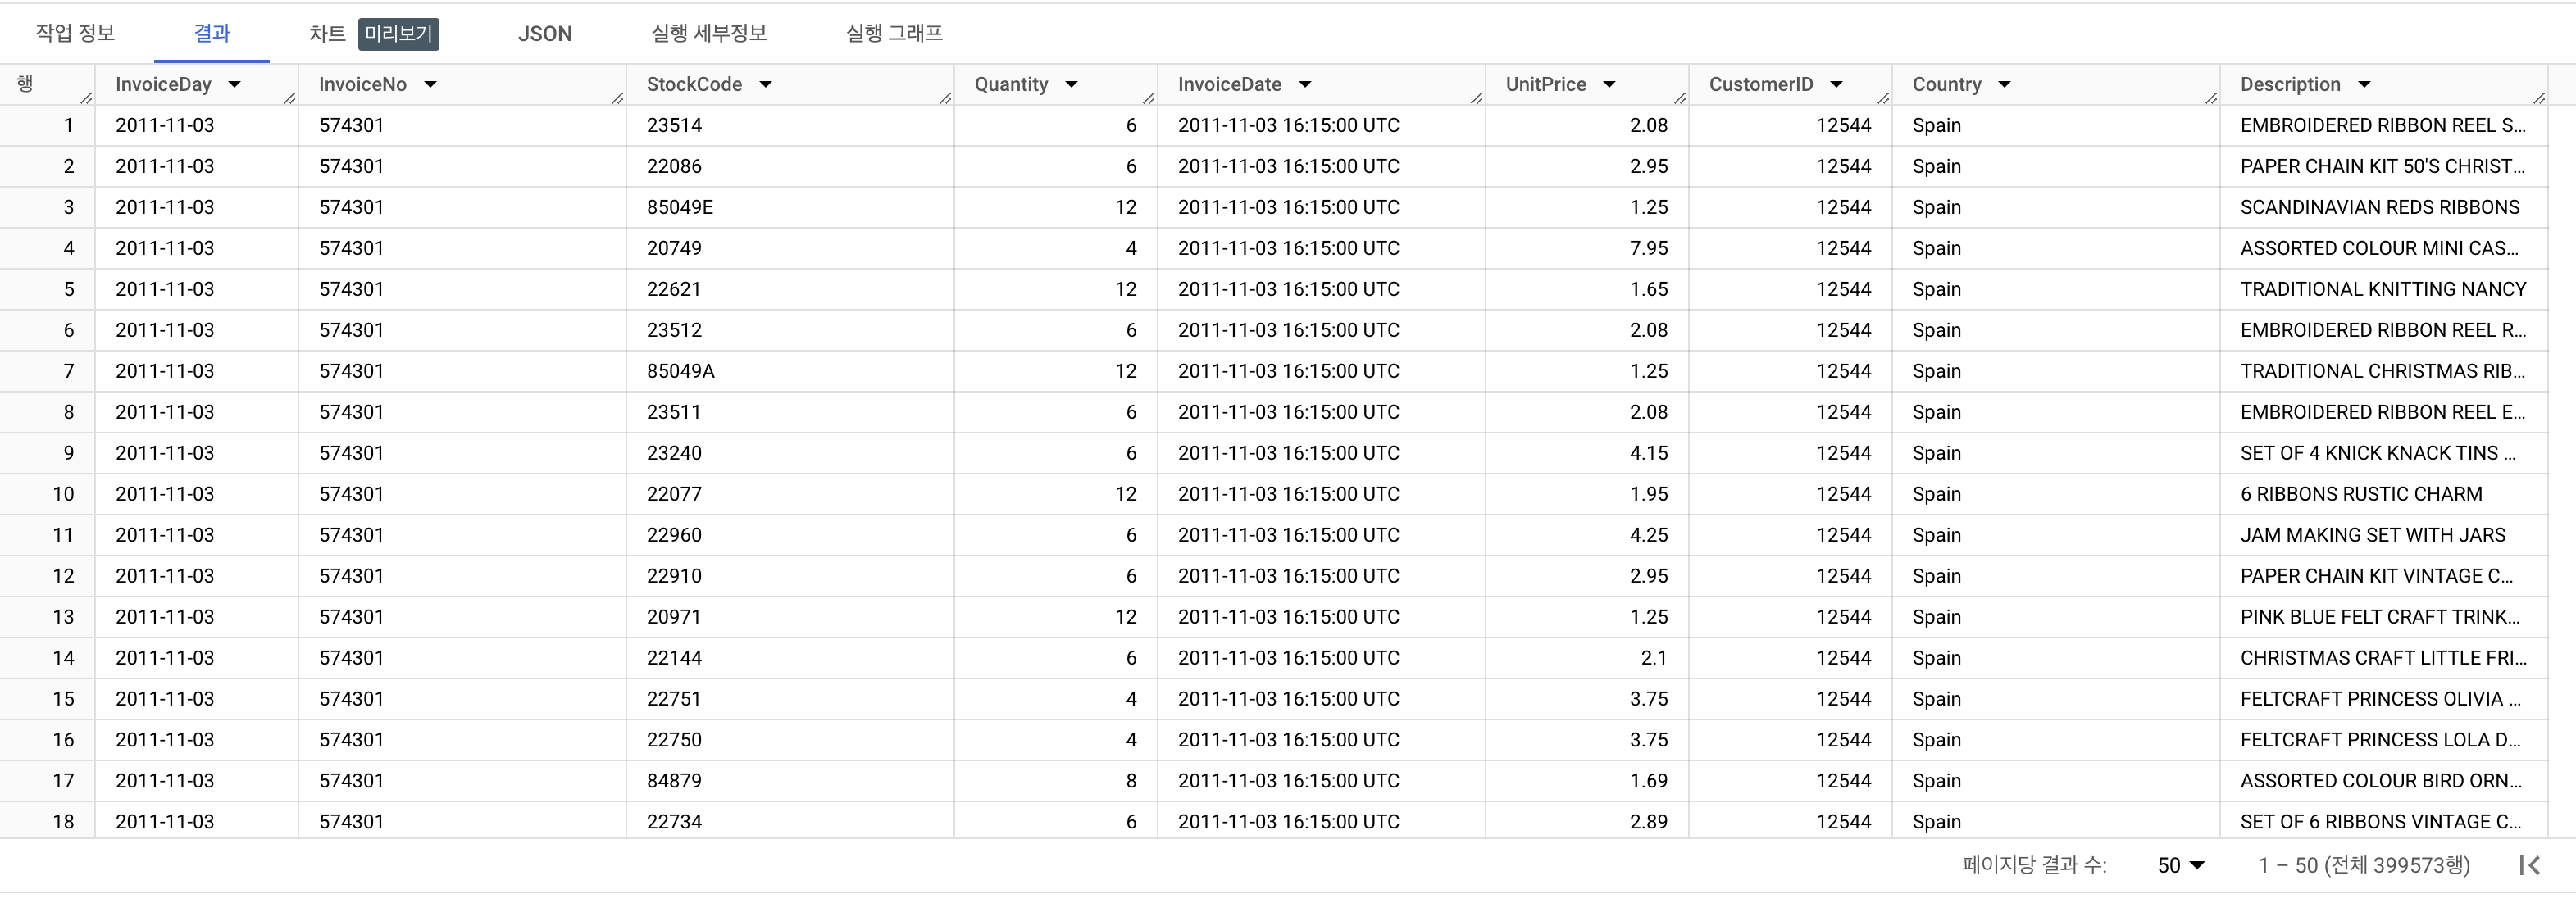

In [ ]:
# 최근 구매 일자를 MAX() 함수로 찾아보겠습니다.

SELECT 
   MAX(InvoiceDate) AS most_recent_date, 
   DATE(MAX(InvoiceDate)) AS InvoiceDay,
   InvoiceNo
FROM omega-vector-411001.modulabs_project.distinct_data
GROUP BY InvoiceNo
ORDER BY most_recent_date DESC

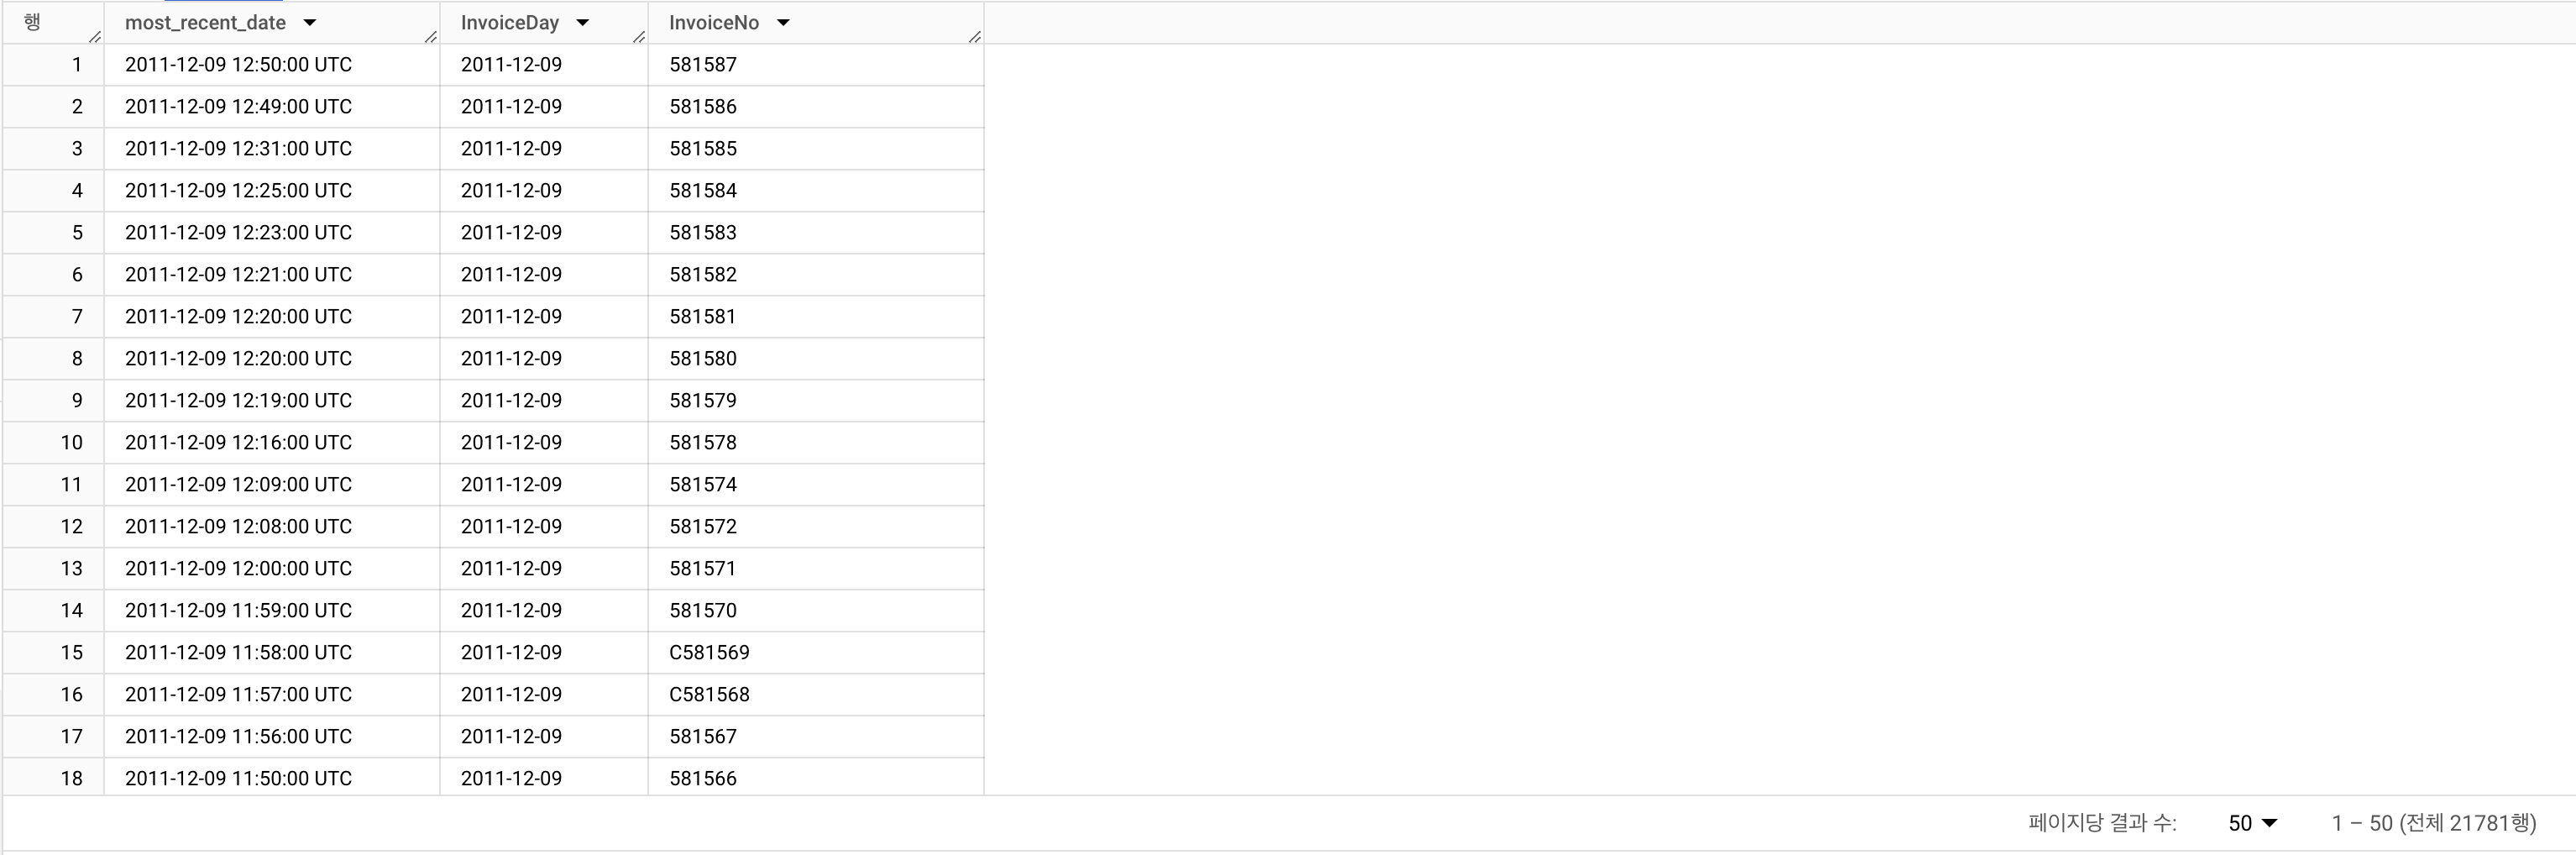

In [ ]:
# 유저 별로 가장 큰 InvoiceDay를 찾아서 가장 최근 구매일로 저장해 주겠습니다.

SELECT
CustomerID,
DATE(MAX(InvoiceDate)) AS InvoiceDay
FROM omega-vector-411001.modulabs_project.distinct_data
GROUP BY CustomerID
ORDER BY InvoiceDay DESC

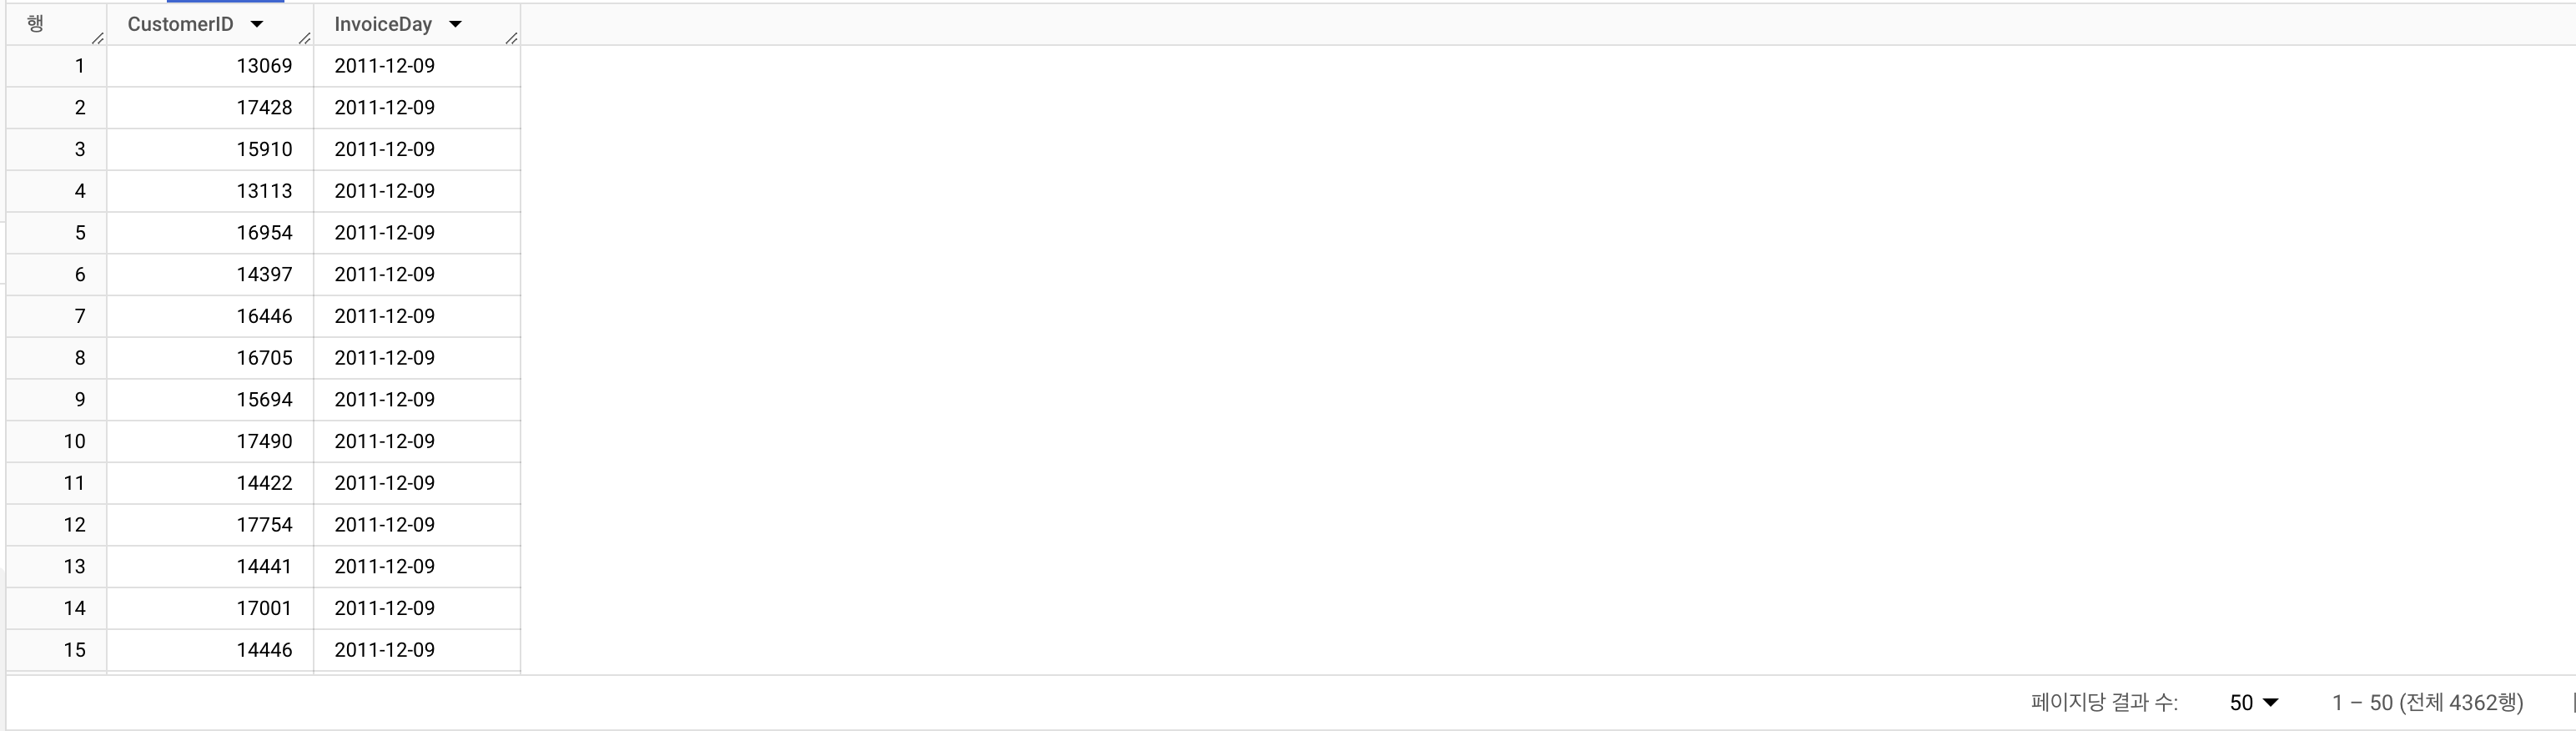

In [ ]:
# 최종 데이터 셋에 필요한 데이터들을 각각 정제해서 이어붙이도록 하겠습니다. 지금까지의 결과를 user_r이라는 이름의 테이블로 저장

CREATE OR REPLACE TABLE omega-vector-411001.modulabs_project.user_r AS
SELECT
  CustomerID, 
  EXTRACT(DAY FROM MAX(InvoiceDay) OVER () - InvoiceDay) AS recency
FROM (
  SELECT 
    CustomerID,
    MAX(DATE(InvoiceDate)) AS InvoiceDay
  FROM omega-vector-411001.modulabs_project.distinct_data
  GROUP BY CustomerID
)

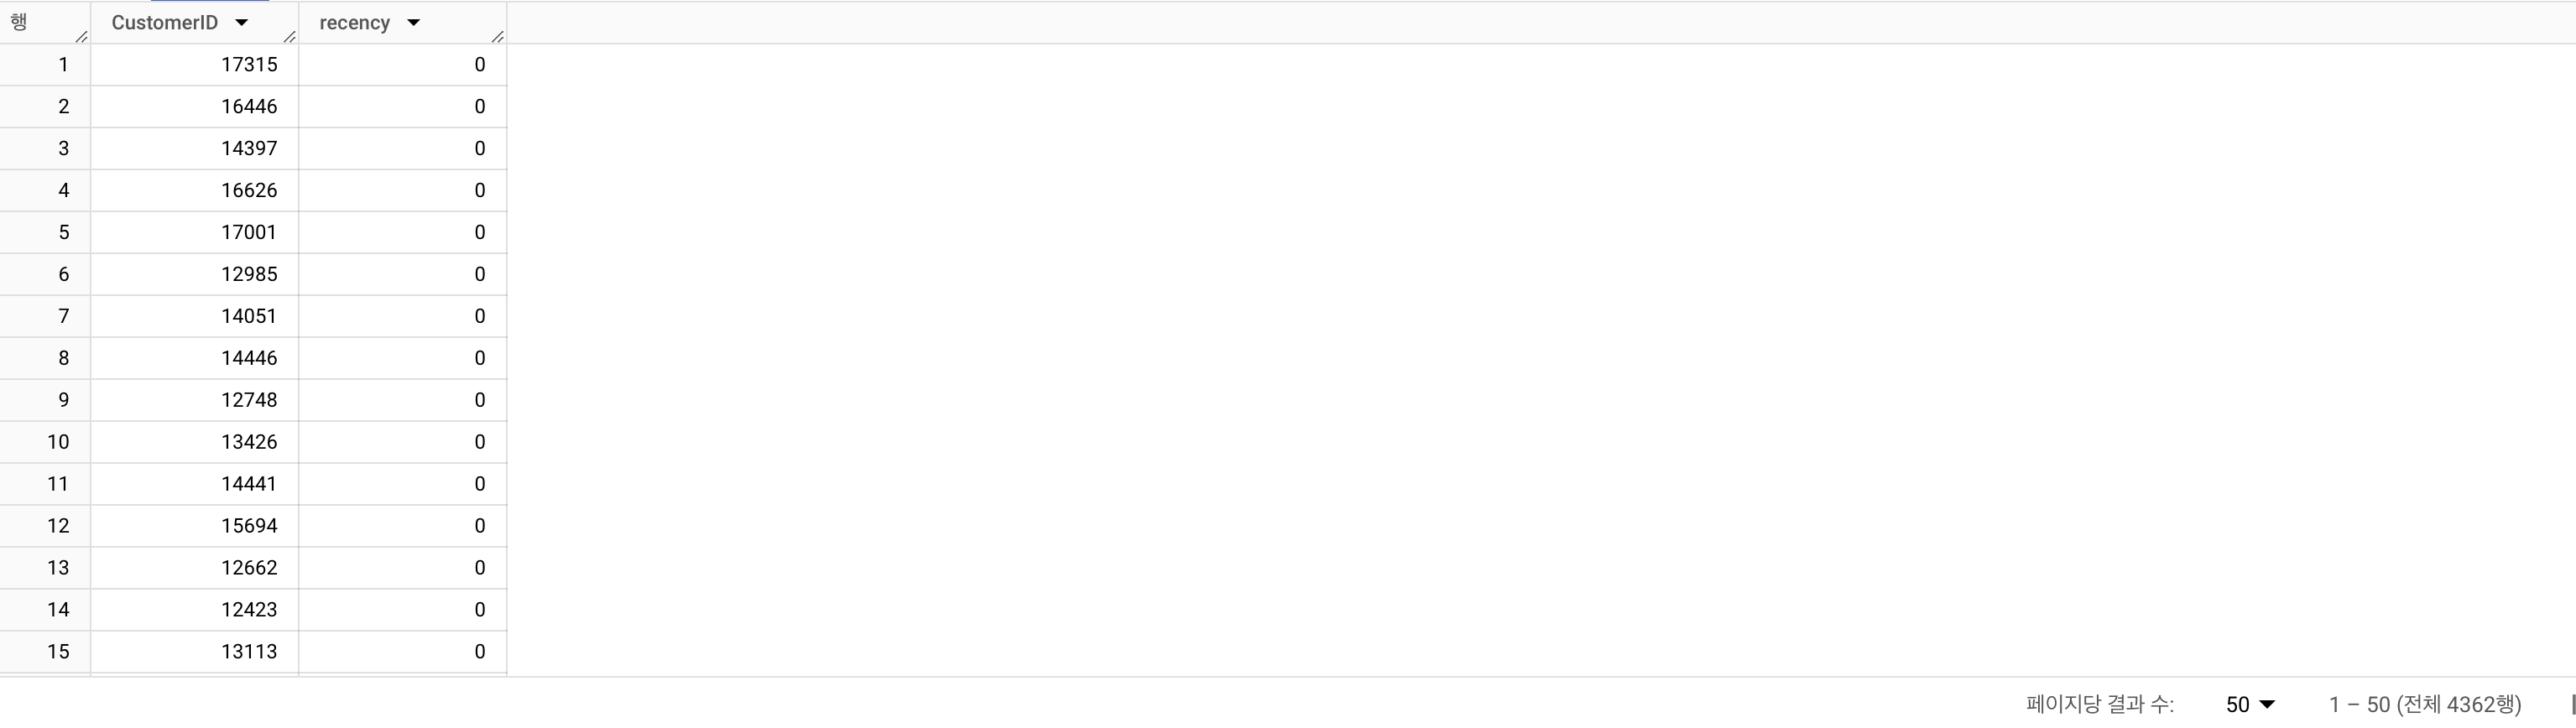

In [ ]:
# 고객마다 고유한 InvoiceNo의 수


SELECT 
  CustomerID,
  COUNT(DISTINCT InvoiceNo) AS purchase_cnt
FROM omega-vector-411001.modulabs_project.distinct_data
GROUP BY CustomerID


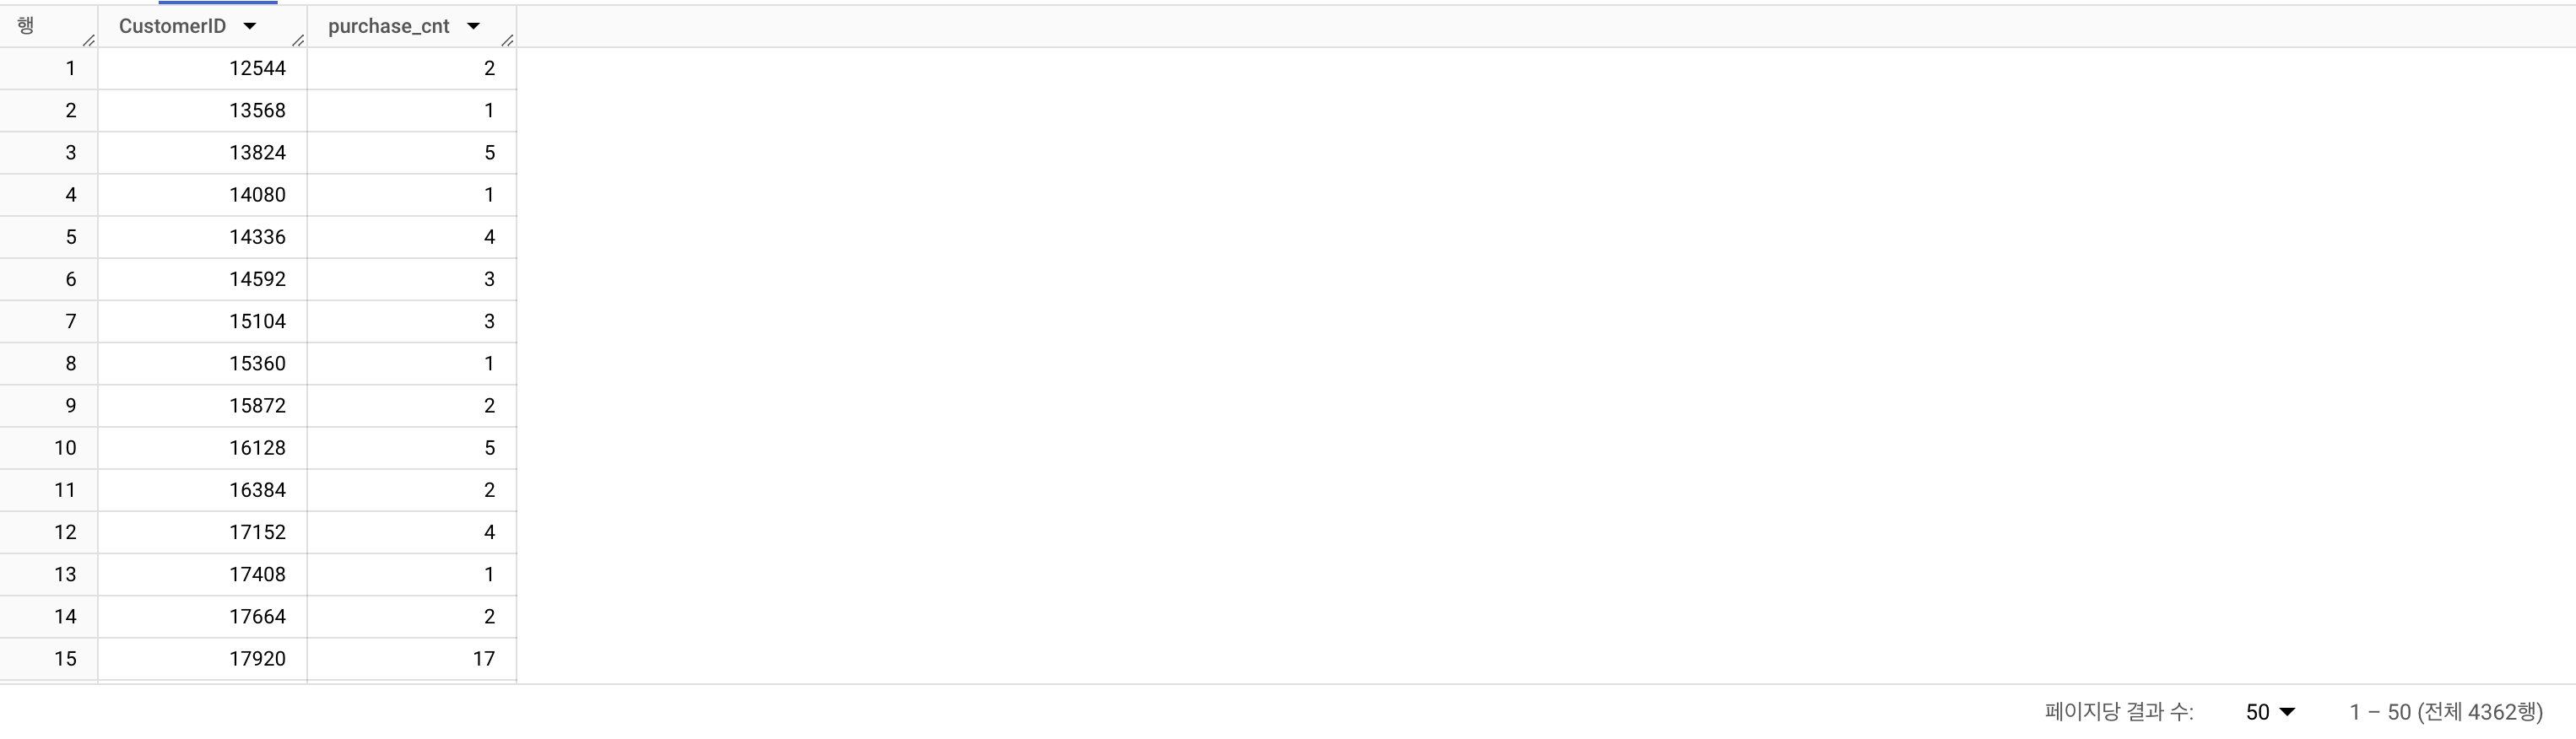

In [ ]:
# 구매한 아이템의 총 수량 계산


SELECT
  CustomerID,
  SUM(Quantity) AS item_cnt
FROM omega-vector-411001.modulabs_project.distinct_data
GROUP BY CustomerID


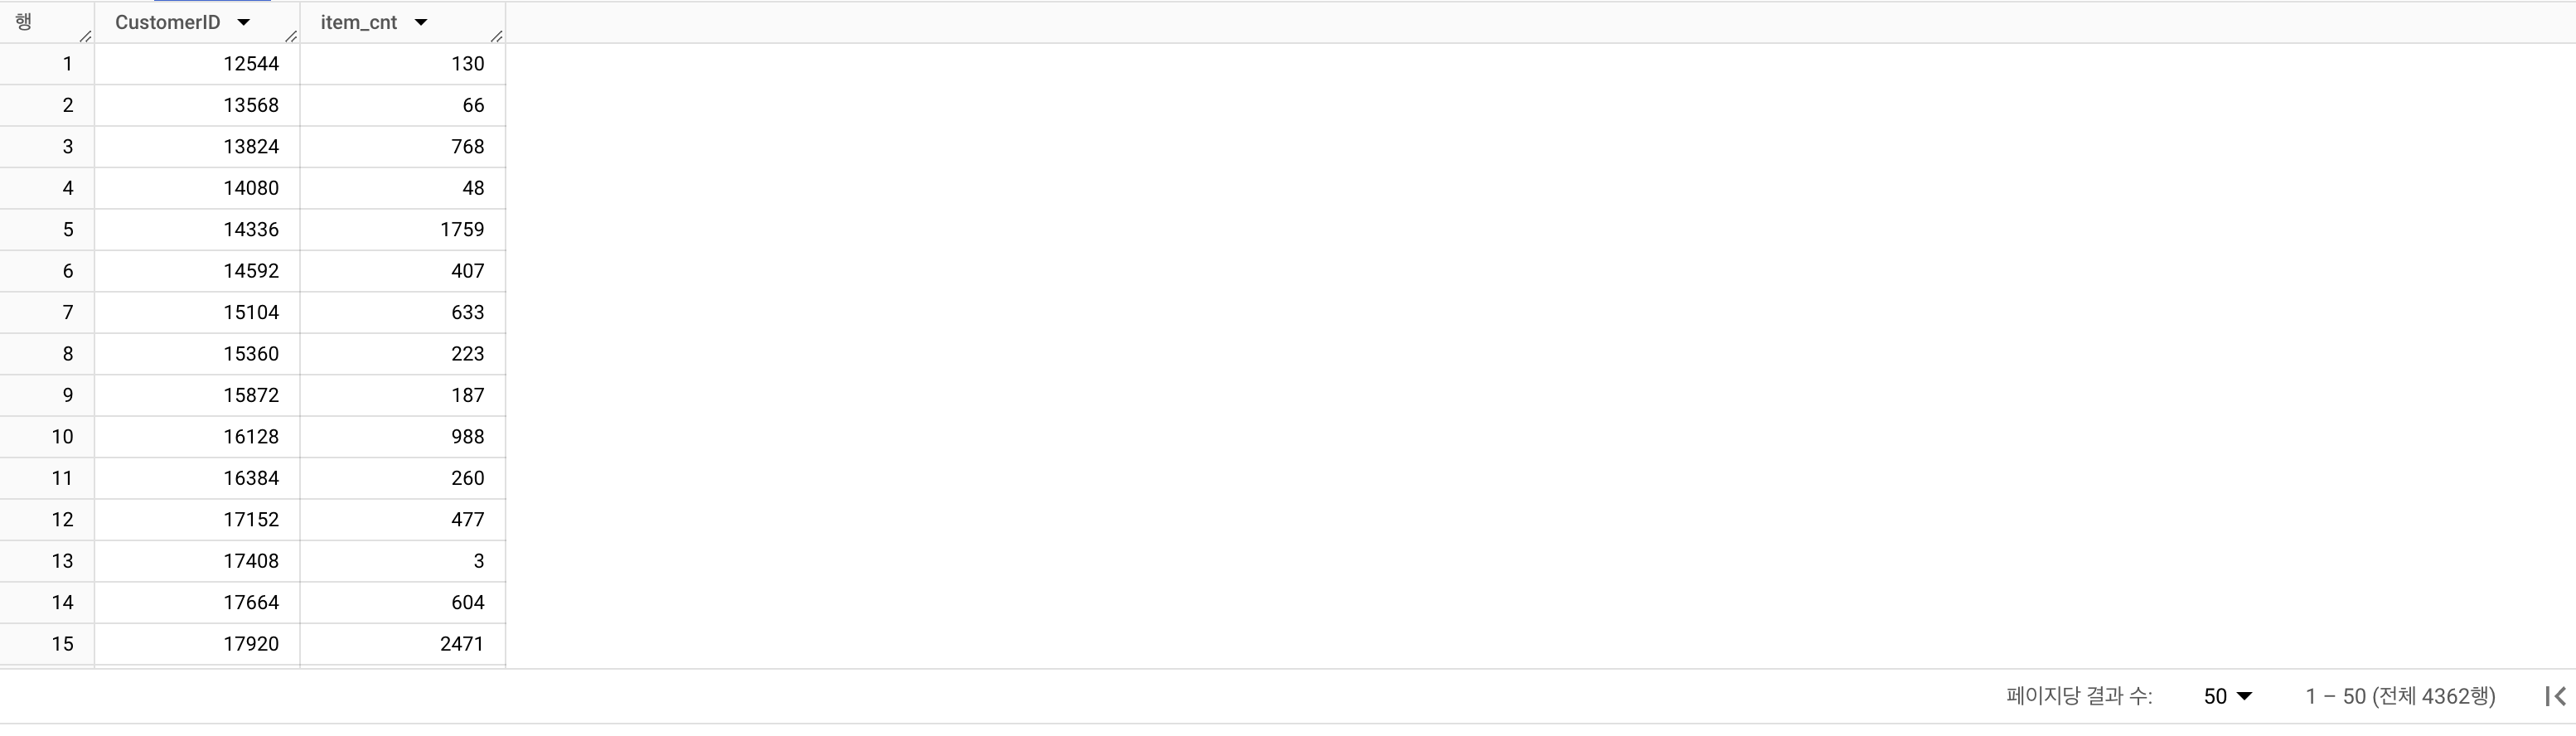

In [ ]:
# 1. 전체 거래 건수 계산'과 '2. 구매한 아이템의 총 수량 계산'의 결과를 합쳐서 user_rf라는 이름의 테이블에 저장해 

CREATE OR REPLACE TABLE omega-vector-411001.modulabs_project.user_rf AS

-- (1) 전체 거래 건수 계산
WITH purchase_cnt AS ( 
  SELECT 
    CustomerID,
    COUNT(DISTINCT InvoiceNo) AS purchase_cnt
  FROM omega-vector-411001.modulabs_project.distinct_data
  GROUP BY CustomerID
),

-- (2) 구매한 아이템 총 수량 계산
item_cnt AS (
  SELECT
    CustomerID,
    SUM(Quantity) AS item_cnt
  FROM omega-vector-411001.modulabs_project.distinct_data
  GROUP BY CustomerID
)

-- 기존의 user_r에 (1)과 (2)를 통합
SELECT
  pc.CustomerID,
  pc.purchase_cnt,
  ic.item_cnt,
  ur.recency
FROM purchase_cnt AS pc
JOIN item_cnt AS ic
  ON pc.CustomerID = ic.CustomerID
JOIN project_name.modulabs_project.user_r AS ur
  ON pc.CustomerID = ur.CustomerID;


In [ ]:
# 고객별 총 지출액 계산

SELECT
  CustomerID,
  ROUND(SUM(Quantity * UnitPrice), 0) AS user_total
FROM omega-vector-411001.modulabs_project.distinct_data
GROUP BY CustomerID

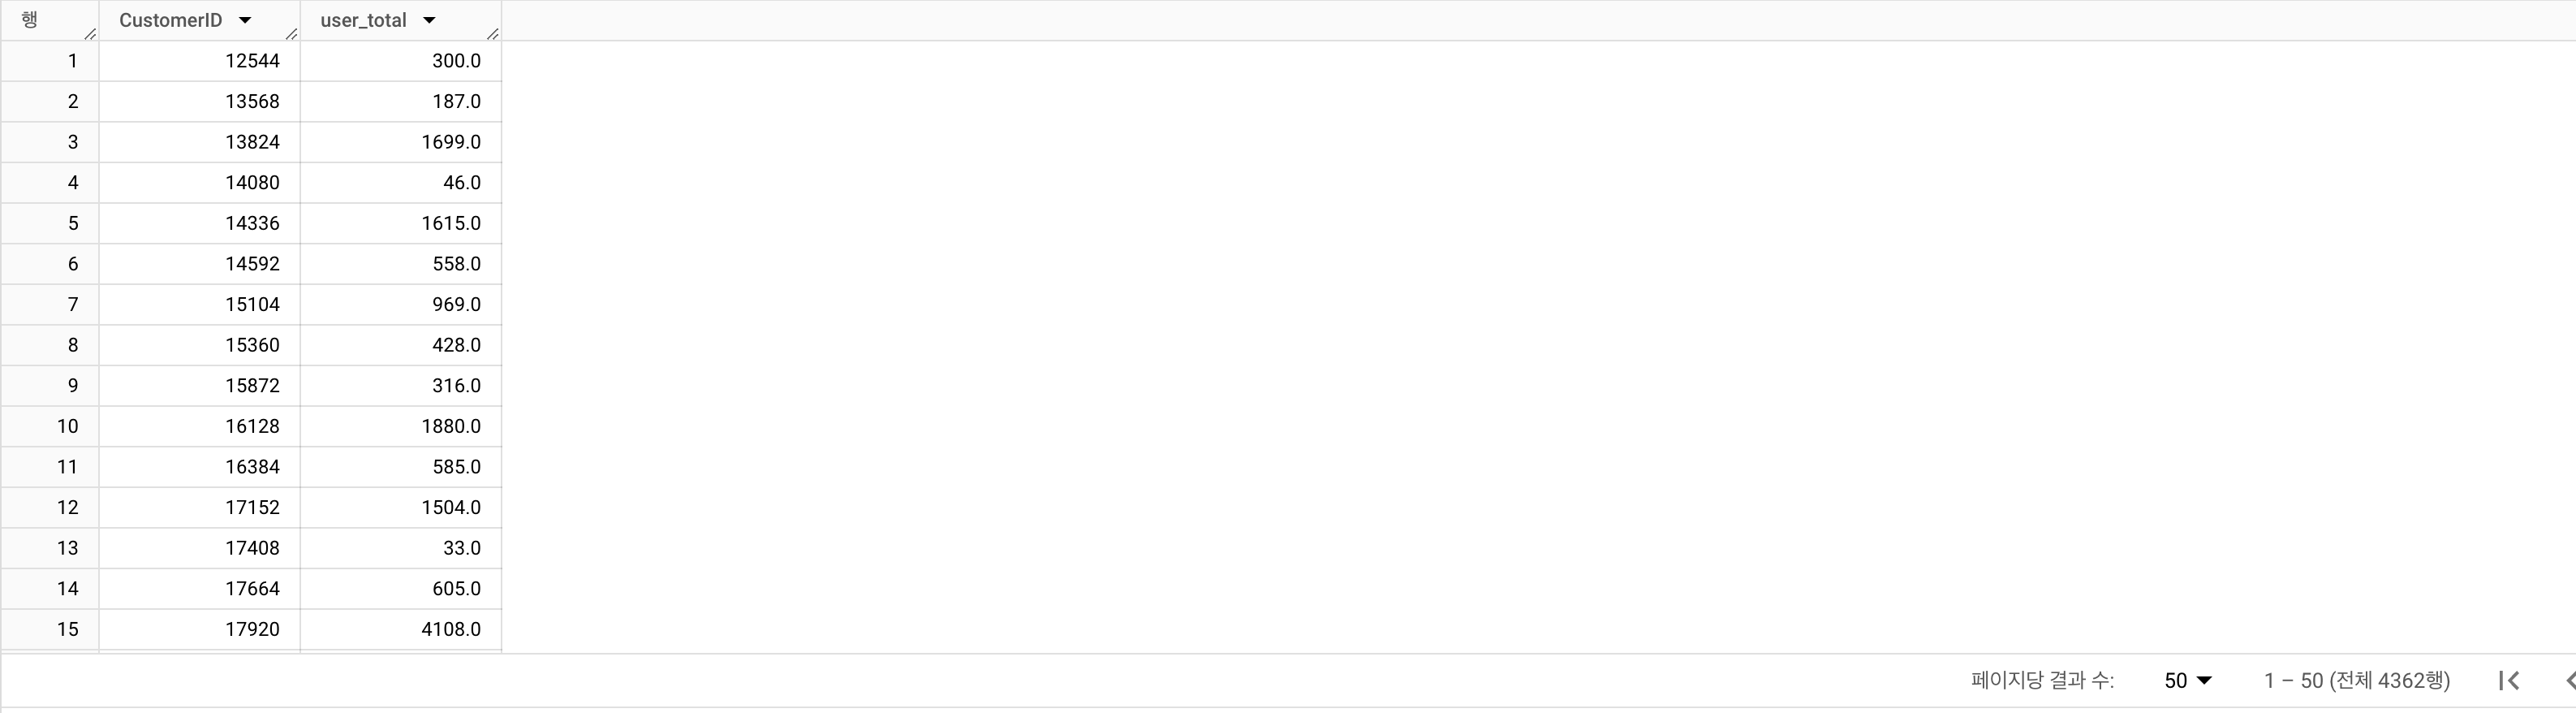

### 회고
- 아직 SQL 많이 부족하다고 느껴진다.
- 문법들이 너무 어렵다.
- https://velog.io/@js8456/Big-Query4 빅쿼리 문법들도 찾아보니 조금은 도움이 됐다.
- 하나하나씩 찾고 chat gpt 물어보면서 진행 했지만 많은 도움이 됀거 같다.